In [127]:
from fcmeans import FCM
from matplotlib import pyplot as plt
from seaborn import scatterplot as scatter
import numpy as np
FU = {}

sustainability_suppliers = np.array([[0.18,0.22,0.16],[0.21,0.31,0.16],[0.10,0.25,0.22]
                                   ,[0.18,0.29,0.12],[0.11,0.08,0.15],[0.26,0.31,0.16]
                                   ,[0.10,0.06,0.22],[0.17,0.26,0.16],[0.21,0.29,0.17]
                                   ,[0.10,0.29,0.10],[0.26,0.22,0.14],[0.14,0.26,0.13]
                                   ,[0.26,0.19,0.09],[0.27,0.08,0.22],[0.19,0.15,0.18]])
for i in range(2,9):
    fcm = FCM(n_clusters=i)
    fcm.fit(sustainability_suppliers)
    fcm_centers = fcm.centers
    fcm_labels = fcm.u.argmax(axis=1)
    FU[i] = (np.sum(fcm.u * fcm.u)) / 15

print(FU)

{2: 0.7643884905009214, 3: 0.6375196912184811, 4: 0.6052389985011671, 5: 0.6107030003447723, 6: 0.6441982648394177, 7: 0.6280372241196591, 8: 0.6280694376429495}


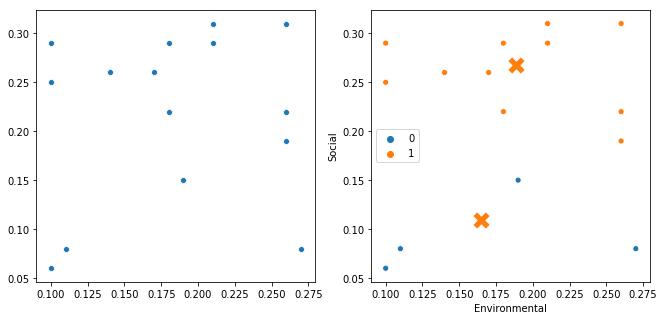

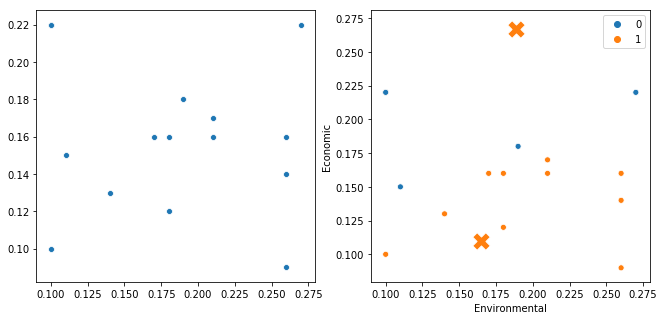

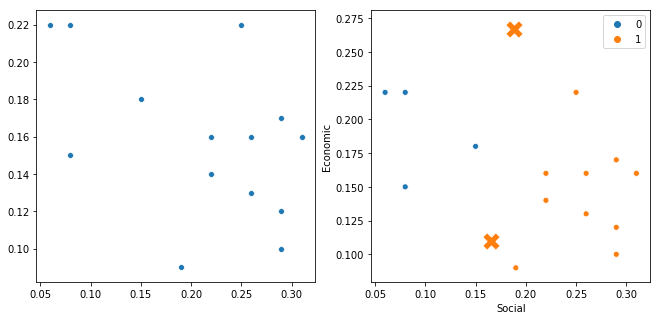

In [129]:
from fcmeans import FCM
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from seaborn import scatterplot as scatter
import numpy as np


sustainability_suppliers = np.array([[0.18,0.22,0.16],[0.21,0.31,0.16],[0.10,0.25,0.22]
                                   ,[0.18,0.29,0.12],[0.11,0.08,0.15],[0.26,0.31,0.16]
                                   ,[0.10,0.06,0.22],[0.17,0.26,0.16],[0.21,0.29,0.17]
                                   ,[0.10,0.29,0.10],[0.26,0.22,0.14],[0.14,0.26,0.13]
                                   ,[0.26,0.19,0.09],[0.27,0.08,0.22],[0.19,0.15,0.18]])

fcm = FCM(n_clusters = 2)
fcm.fit(sustainability_suppliers)
fcm_centers = fcm.centers
fcm_labels  = fcm.u.argmax(axis=1)

# plot result
%matplotlib inline
f, axes = plt.subplots(1, 2, figsize=(11,5))
scatter(sustainability_suppliers[:,0], sustainability_suppliers[:,1], ax=axes[0])
scatter(sustainability_suppliers[:,0], sustainability_suppliers[:,1], ax=axes[1], hue=fcm_labels)
scatter(fcm_centers[:,0], fcm_centers[:,1], ax=axes[1],marker="X",s=300)
plt.xlabel("Environmental")
plt.ylabel("Social")
plt.show()

%matplotlib inline
f, axes = plt.subplots(1, 2, figsize=(11,5))
scatter(sustainability_suppliers[:,0], sustainability_suppliers[:,2], ax=axes[0])
scatter(sustainability_suppliers[:,0], sustainability_suppliers[:,2], ax=axes[1], hue=fcm_labels)
scatter(fcm_centers[:,0], fcm_centers[:,1], ax=axes[1],marker="X",s=300)
plt.xlabel("Environmental")
plt.ylabel("Economic")
plt.show()

%matplotlib inline
f, axes = plt.subplots(1, 2, figsize=(11,5))
scatter(sustainability_suppliers[:,1], sustainability_suppliers[:,2], ax=axes[0])
scatter(sustainability_suppliers[:,1], sustainability_suppliers[:,2], ax=axes[1], hue=fcm_labels)
scatter(fcm_centers[:,0], fcm_centers[:,1], ax=axes[1],marker="X",s=300)
plt.xlabel("Social")
plt.ylabel("Economic")
plt.show()

In [130]:
print(fcm_centers)
print("_________________________")
print(fcm.u)
print("_________________________")
print(fcm_labels)

[[0.16491659 0.10970347 0.18514972]
 [0.18824057 0.26723203 0.14754031]]
_________________________
[[0.15853472 0.84146528]
 [0.05432653 0.94567347]
 [0.34682144 0.65317856]
 [0.03508952 0.96491048]
 [0.88916337 0.11083663]
 [0.12531674 0.87468326]
 [0.87634612 0.12365388]
 [0.02271197 0.97728803]
 [0.04125973 0.95874027]
 [0.19372149 0.80627851]
 [0.2423956  0.7576044 ]
 [0.09285618 0.90714382]
 [0.37018784 0.62981216]
 [0.78148484 0.21851516]
 [0.86653614 0.13346386]]
_________________________
[1 1 1 1 0 1 0 1 1 1 1 1 1 0 0]


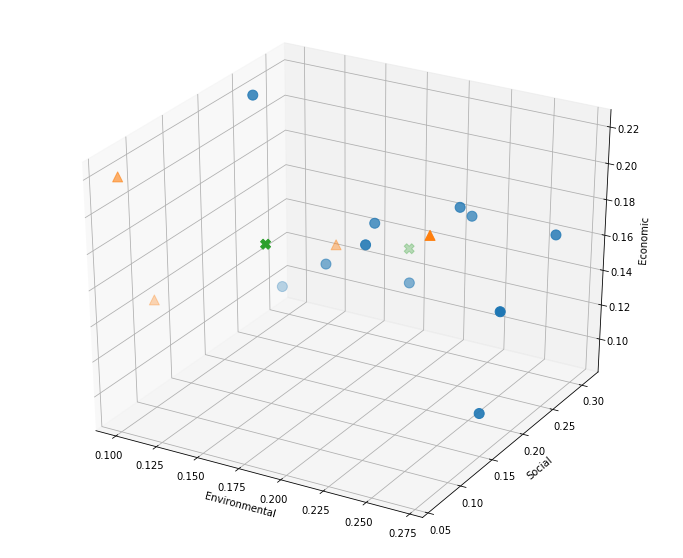

In [132]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')



g1 = np.array([[0.18,0.22,0.16],[0.21,0.31,0.16],[0.10,0.25,0.22]
                                   ,[0.18,0.29,0.12],[0.26,0.31,0.16]
                                   ,[0.17,0.26,0.16],[0.21,0.29,0.17]
                                   ,[0.10,0.29,0.10],[0.26,0.22,0.14]
                                   ,[0.14,0.26,0.13],[0.26,0.19,0.09]])

g2 = np.array([[0.11,0.08,0.15],[0.10,0.06,0.22],
                   [0.27,0.08,0.22],[0.19,0.15,0.18]])

ax.scatter(g1[:,0], g1[:,1], g1[:,2],s = 100, marker='o')
ax.scatter(g2[:,0], g2[:,1], g2[:,2],s = 100, marker='^')
ax.scatter(fcm_centers[:,0], fcm_centers[:,1], fcm_centers[:,2],s = 100, marker='X')


ax.set_xlabel('Environmental')
ax.set_ylabel('Social')
ax.set_zlabel('Economic')

plt.show()

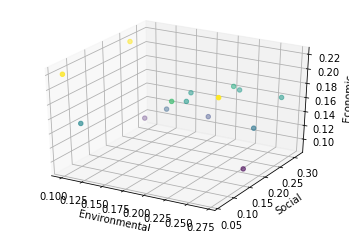

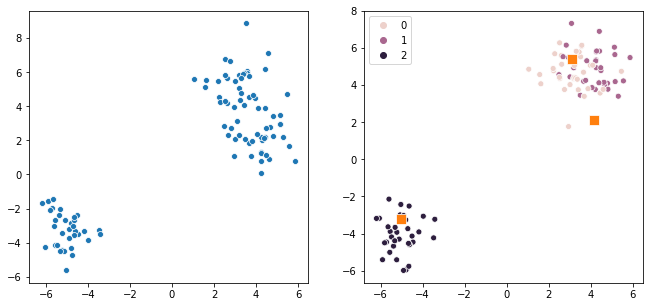

In [20]:
from fcmeans import FCM
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from seaborn import scatterplot as scatter


# create artifitial dataset
n_samples = 100
n_bins = 3  # use 3 bins for calibration_curve as we have 3 clusters here
centers = [(-5, -4, -3), (4, 5, 2), (3, 5, 5)]

X,_ = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)

# fit the fuzzy-c-means
fcm = FCM(n_clusters=3)
fcm.fit(X)

# outputs
fcm_centers = fcm.centers
fcm_labels  = fcm.u.argmax(axis=1)


# plot result
%matplotlib inline
f, axes = plt.subplots(1, 2, figsize=(11,5))
scatter(X[:,0], X[:,2], ax=axes[0])
scatter(X[:,0], X[:,1], ax=axes[1], hue=fcm_labels)
scatter(fcm_centers[:,0], fcm_centers[:,2], ax=axes[1],marker="s",s=100)
plt.show()


In [23]:
X

array([[-4.50328585, -4.1382643 , -2.35231146],
       [-3.47697014, -4.23415337, -3.23413696],
       [-3.42078718, -3.23256527, -3.46947439],
       [-4.45743996, -4.46341769, -3.46572975],
       [-4.75803773, -5.91328024, -4.72491783],
       [-5.56228753, -5.01283112, -2.68575267],
       [-5.90802408, -5.4123037 , -1.53435123],
       [-5.2257763 , -3.9324718 , -4.42474819],
       [-5.54438272, -3.88907741, -4.15099358],
       [-4.62430198, -4.60063869, -3.29169375],
       [-5.60170661, -2.14772182, -3.01349722],
       [-6.05771093, -3.17745509, -4.22084365],
       [-4.7911364 , -5.95967012, -4.32818605],
       [-4.80313876, -3.26153342, -2.82863172],
       [-5.11564828, -4.3011037 , -4.47852199],
       [-5.71984421, -4.46063877, -1.94287777],
       [-4.65638171, -5.76304016, -2.67591603],
       [-5.38508228, -4.676922  , -2.38832371],
       [-3.96900048, -3.06871988, -3.83921752],
       [-5.30921238, -3.66873657, -2.02445487],
       [-5.47917424, -4.18565898, -4.106

In [15]:
X[:,1]

array([-5.1382643 , -5.23415337, -4.23256527, -5.46341769, -6.91328024,
       -6.01283112, -6.4123037 , -4.9324718 , -4.88907741, -5.60063869,
       -3.14772182, -4.17745509, -6.95967012, -4.26153342, -5.3011037 ,
       -5.46063877, -6.76304016, -5.676922  , -4.06871988, -4.66873657,
       -5.18565898, -4.18747418, -3.9964671 , -4.63860439, -3.43535634,
       -4.91295293, -6.98756891, -3.52210596, -5.50175704, -5.5297602 ,
       -4.03135501, -5.39210815, -4.73894473, -6.41537074,  3.19772273,
        5.8861859 ,  3.92555408,  4.06023021,  4.30154734,  5.14282281,
        3.09061255,  4.58685709,  3.43370227,  2.44933657,  4.47359243,
        3.21674671,  2.76913568,  2.39251677,  4.78182287,  4.52194157,
        4.34644821,  4.29307247,  4.47383292,  3.02531833,  3.17931768,
        4.82206016,  3.24626384,  3.92289829,  4.82718325,  3.73534317,
        3.14284244,  3.77653721,  3.92717109,  3.55348505,  2.75426122,
        3.11614256,  2.8570297 ,  6.08305124,  4.06217496,  5.51

In [12]:
scatter(X[:,0], X[:,2], ax=axes[1], hue=fcm_labels)
plt.show()

In [13]:
fcm_centers


array([[ 4.98099868,  4.57049566,  5.51924823],
       [ 4.28739185,  3.91816722,  3.98000679],
       [-5.01709872, -5.11385621, -5.22436804]])

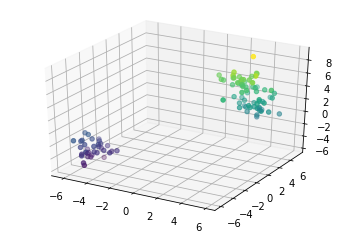

In [22]:
x_axis = X[:,0]
y_axis = X[:,1]
z_axis = X[:,2]
from mpl_toolkits import mplot3d

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
myplot = plt.axes(projection='3d')
myplot.scatter3D(x_axis, y_axis, z_axis, c=z_axis);
#scatter(fcm_centers[:,0], fcm_centers[:,1], ax=axes[1],marker="s",s=1000)


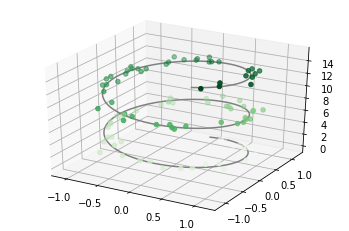

In [77]:
from mpl_toolkits import mplot3d

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection='3d')


# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

In [46]:
import numpy as np
z = np.array([[1,2,3],[1,1,1], [2,6,5]])

In [45]:
print(z)

[[1 2 3]
 [1 1 1]
 [2 6 5]]


In [54]:
fcm2 = FCM(n_clusters=1)
fcm2.fit(z)

# outputs
fcm_centerss = fcm2.centers
fcm_labelss  = fcm2.u.argmax(axis=1)

In [56]:
fcm_labelss

array([0, 0, 0], dtype=int64)

In [7]:
from fcmeans import FCM
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from seaborn import scatterplot as scatter


# create artifitial dataset
n_samples = 50000
n_bins = 3  # use 3 bins for calibration_curve as we have 3 clusters here
centers = [(-5, -5), (0, 0), (5, 5)]

X,_ = make_blobs(n_samples=n_samples, n_features=3, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)

In [8]:
X

array([[-4.50328585, -5.1382643 ],
       [-4.35231146, -3.47697014],
       [-5.23415337, -5.23413696],
       ...,
       [ 6.31542239,  4.77477507],
       [ 4.43022245,  5.40918508],
       [ 4.78890833,  5.12006294]])

In [27]:
import pandas as pd
data = pd.read_csv(r"D:\first semester_master\fuzzy project\data.csv") 

In [28]:
data.set_index('criteria', inplace = True)
data

,supplier1,supplier2,supplier3
criteria,,,
robustness,9,5,3
agility,5,1,2
flexibility,1,6,7


In [35]:
import numpy as np
arrdata = np.array(data).transpose()
arrdata

array([[9, 5, 1],
       [5, 1, 6],
       [3, 2, 7]], dtype=int64)

In [37]:
fcm = FCM(n_clusters=3)
fcm.fit(arrdata)


# outputs
fcm_centers = fcm.centers
fcm_labels  = fcm.u.argmax(axis=1)


# plot result
# %matplotlib inline
# f, axes = plt.subplots(1, 2, figsize=(11,5))
# scatter(X[:,0], X[:,1], ax=axes[0])
# scatter(X[:,0], X[:,1], ax=axes[1], hue=fcm_labels)
# scatter(fcm_centers[:,0], fcm_centers[:,1], ax=axes[1],marker="s",s=200)
# plt.show()

ValueError: array must not contain infs or NaNs

In [37]:
import random
for i in range(10):
    print(random.choice([1,3,5,7,9]))

9
5
5
1
5
5
1
9
9
1


In [36]:
di = {}
type(di)

dict

In [37]:
for i in range(5):
    di[i] = i*2

In [39]:
max(di)

4

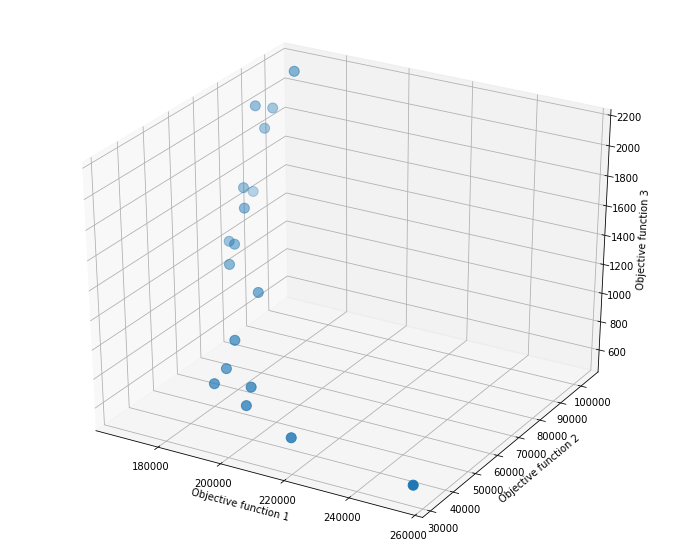

In [6]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

pareto = np.array([[255774.849,31844.661,556.668]
,[217642.434,32889.04,646.545]
,[201257.507,36031.867,736.422]
,[200676.986,38882.373,826.3]
,[190041.483,42541.666,851.75]
,[190048.057,46244.445,1003.398]
,[190036.39,37538.918,807.34]
,[188150.816,58739.513,1179.524]
,[176139.996,62458.151,1269.294]
,[175007.382,66176.789,1361.702]
,[170345.143,69895.427,1319.034]
,[174169.53,71650.912,1545.317]
,[169595.706,77332.703,1603.917]
,[166965.431,84769.979,1489.515]
,[168218.521,88488.617,1888.092]
,[168106.127,92207.255,1987.978]
,[166325.247,87171.449,2042.832]
,[166839.602,103363.169,2123.407]
,[166839.602,103363.169,2123.407]])

ax.scatter(pareto[:,0], pareto[:,1], pareto[:,2],s = 100, marker='o')
ax.set_xlabel('Objective function 1')
ax.set_ylabel('Objective function 2')
ax.set_zlabel('Objective function 3')

plt.show()

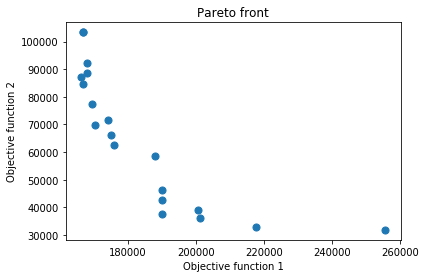

In [35]:
import numpy as np
import matplotlib.pyplot as plt


# Plot
plt.scatter(pareto[:,0], pareto[:,1], s = 50, marker='o')
plt.title('Pareto front')
plt.xlabel('Objective function 1')
plt.ylabel('Objective function 2')
plt.show()

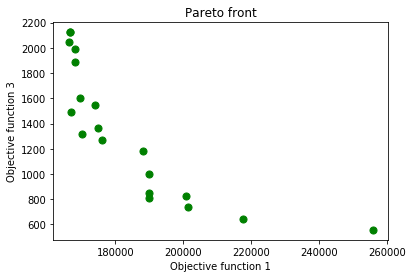

In [38]:
import numpy as np
import matplotlib.pyplot as plt


# Plot
plt.scatter(pareto[:,0], pareto[:,2],color='green', s = 50, marker='o')
plt.title('Pareto front')
plt.xlabel('Objective function 1')
plt.ylabel('Objective function 3')
plt.show()

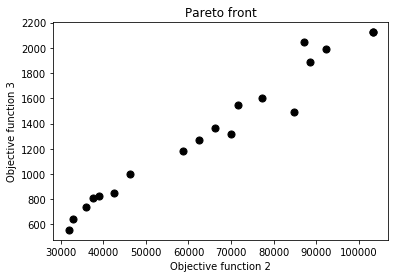

In [39]:
import numpy as np
import matplotlib.pyplot as plt


# Plot
plt.scatter(pareto[:,1], pareto[:,2],color='black', s = 50, marker='o')
plt.title('Pareto front')
plt.xlabel('Objective function 2')
plt.ylabel('Objective function 3')
plt.show()

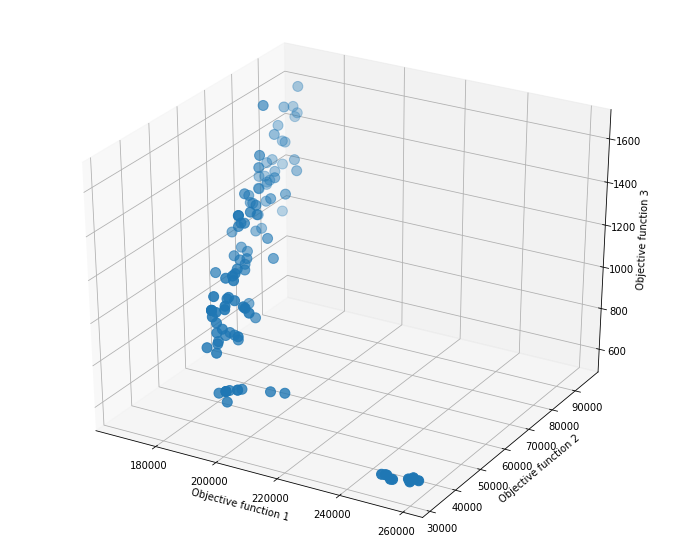

In [3]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np


pareto2 = np.array([[252203.651,31813.174,566.448]
,[199729.622,32073.477,729.489]
,[259366.512,33919.727,566.448]
,[197496.527,35420.782,744.968]
,[191845.563,37747.405,923.487]
,[191453.961,37804.694,1069.58]
,[190216.892,37836.133,1044.162]
,[200447.552,38438.01,1114.63]
,[194318.49,37848.205,1091.89]
,[190275.37,38438.01,1133.505]
,[191024.806,38376.194,1013.539]
,[194319.244,38007.024,1106.792]
,[198878.529,37453.884,985.291]
,[250134.26,32975.968,566.448]
,[195849.04,33401.794,744.968]
,[194032.518,34885.375,914.047]
,[198567.126,39907.831,1102.007]
,[190826.358,44722.899,1176.395]
,[199366.959,41018.435,1065.692]
,[190319.699,43114.706,1082.564]
,[190735.127,38714.069,963.081]
,[192917.942,42991.93,1083.853]
,[192167.982,43591.496,1169.279]
,[188521.04,44781.563,1158.088]
,[256909.059,33605.917,566.448]
,[207847.056,38861.689,744.968]
,[192655.755,44289.619,886.729]
,[190661.023,43331.339,1088.711]
,[190326.598,37484.57,1078.298]
,[192118.743,44261.675,1196.022]
,[179353.721,51125.117,1099.132]
,[190326.598,37484.57,1078.298]
,[190326.598,37484.57,1078.298]
,[192360.417,38976.745,984.12]
,[186602.347,51125.117,1140.456]
,[257259.482,34510.322,566.448]
,[199332.439,36325.061,744.968]
,[190045.639,42626.606,913.449]
,[185784.442,54769.001,1102.007]
,[181511.629,57468.67,1269.08]
,[179861.314,57468.67,1126.421]
,[182367.346,57468.67,1287.82]
,[181775.515,57468.67,1113.235]
,[185566.385,57468.67,1348.787]
,[183548.797,57468.67,1290.793]
,[184110.973,57468.67,1127.027]
,[249641.415,32970.765,566.448]
,[200087.388,37081.459,744.968]
,[192801.763,42816.694,923.487]
,[188593.339,62311.91,1102.007]
,[185427.104,63812.224,1173.477]
,[178022.953,63812.224,1358.384]
,[175805.738,63812.224,1249.263]
,[173525.271,63812.224,1164.577]
,[175805.738,63812.224,1249.263]
,[175805.738,63812.224,1249.263]
,[181759.054,63812.224,1316.998]
,[248647.977,32758.828,566.448]
,[199332.439,36325.061,744.968]
,[190137.559,35737.466,918.108]
,[183753.427,57133.897,1102.007]
,[182603.914,63221.214,1280.527]
,[175812.616,70155.778,1124.254]
,[174970.931,70155.778,1253.468]
,[174128.276,70155.778,1254.192]
,[177216.281,70155.778,1427.26]
,[173679.002,70155.778,1286.171]
,[177548.019,70155.778,1484.864]
,[257604.803,32665.844,566.448]
,[211802.653,39689.132,744.968]
,[185134.231,56772.871,923.487]
,[179564.546,62736.882,1102.007]
,[179885.839,71422.431,1280.527]
,[171508.303,76499.331,1260.081]
,[173804.549,76499.331,1207.971]
,[171048.198,76499.331,1134.297]
,[173347.939,76499.331,1653.935]
,[171301.99,76499.331,1261.295]
,[176835.221,76499.331,1328.711]
,[252780.166,31955.829,566.448]
,[196985.427,34696.119,744.968]
,[190036.152,39956.186,908.813]
,[174449.098,73902.9,1102.007]
,[169510.972,82842.885,1243.781]
,[171271.407,82842.885,1291.376]
,[168545.773,82842.885,1324.295]
,[168586.497,82842.885,1231.603]
,[168404.556,82842.885,1220.391]
,[167848.303,82842.885,1257.607]
,[178687.888,82842.885,1317.58]
,[256416.199,33600.715,566.448]
,[196985.427,34696.119,744.968]
,[191858.446,51656.627,923.487]
,[171999.49,84722.862,1088.482]
,[168335.593,80053.089,1280.527]
,[168317.21,89186.438,1267.448]
,[168349.991,89186.438,1377.639]
,[169046.818,89186.438,1539.577]
,[166957.589,89186.438,1446.774]
,[169299.245,89186.438,1374.996]
,[168075.636,85510.768,1316.517]
,[257663.829,34007.504,566.448]
,[196985.427,34696.119,744.968]
,[190049.356,44177.83,913.64]
,[176484.239,63889.804,1102.007]
,[181858.469,74826.064,1280.527]
,[170712.256,83469.999,1459.047]
,[168280.08,95529.992,1586.652]
,[167170.682,95529.992,1441.04]
,[167989.058,95529.992,1461.642]
,[166580.903,95529.992,1487.689]
,[175025.752,86209.375,1332.218]])


fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pareto2[:,0], pareto2[:,1], pareto2[:,2],s = 100, marker='o')
ax.set_xlabel('Objective function 1')
ax.set_ylabel('Objective function 2')
ax.set_zlabel('Objective function 3')

plt.show()

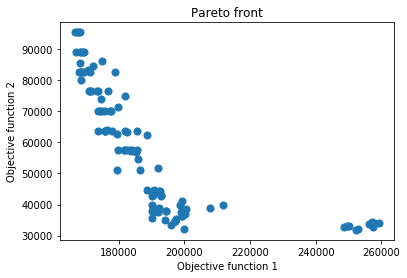

In [4]:
import numpy as np
import matplotlib.pyplot as plt


# Plot
plt.scatter(pareto2[:,0], pareto2[:,1], s = 50, marker='o')
plt.title('Pareto front')
plt.xlabel('Objective function 1')
plt.ylabel('Objective function 2')
plt.show()

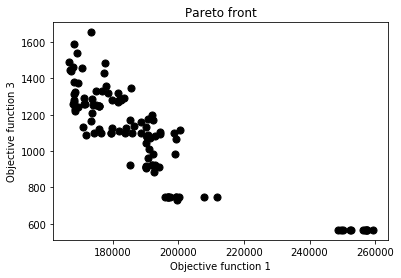

In [8]:
import numpy as np
import matplotlib.pyplot as plt


# Plot
plt.scatter(pareto2[:,0], pareto2[:,2], color = 'black', s = 50, marker='o')
plt.title('Pareto front')
plt.xlabel('Objective function 1')
plt.ylabel('Objective function 3')
plt.show()

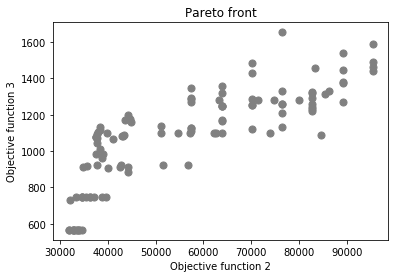

In [9]:
import numpy as np
import matplotlib.pyplot as plt


# Plot
plt.scatter(pareto2[:,1], pareto2[:,2], color='gray', s = 50, marker='o')
plt.title('Pareto front')
plt.xlabel('Objective function 2')
plt.ylabel('Objective function 3')
plt.show()

array([2, 3, 4])

In [40]:
anarray = np.array([[252203.651,31813.174,566.448]
,[199729.622,32073.477,729.489]
,[259366.512,33919.727,566.448]
,[197496.527,35420.782,744.968]
,[191845.563,37747.405,923.487]
,[191453.961,37804.694,1069.58]
,[190216.892,37836.133,1044.162]
,[200447.552,38438.01,1114.63]
,[194318.49,37848.205,1091.89]
,[190275.37,38438.01,1133.505]
,[191024.806,38376.194,1013.539]
,[194319.244,38007.024,1106.792]
,[198878.529,37453.884,985.291]
,[250134.26,32975.968,566.448]
,[195849.04,33401.794,744.968]
,[194032.518,34885.375,914.047]
,[198567.126,39907.831,1102.007]
,[190826.358,44722.899,1176.395]
,[199366.959,41018.435,1065.692]
,[190319.699,43114.706,1082.564]
,[190735.127,38714.069,963.081]
,[192917.942,42991.93,1083.853]
,[192167.982,43591.496,1169.279]
,[188521.04,44781.563,1158.088]
,[256909.059,33605.917,566.448]
,[207847.056,38861.689,744.968]
,[192655.755,44289.619,886.729]
,[190661.023,43331.339,1088.711]
,[190326.598,37484.57,1078.298]
,[192118.743,44261.675,1196.022]
,[179353.721,51125.117,1099.132]
,[190326.598,37484.57,1078.298]
,[190326.598,37484.57,1078.298]
,[192360.417,38976.745,984.12]
,[186602.347,51125.117,1140.456]
,[257259.482,34510.322,566.448]
,[199332.439,36325.061,744.968]
,[190045.639,42626.606,913.449]
,[185784.442,54769.001,1102.007]
,[181511.629,57468.67,1269.08]
,[179861.314,57468.67,1126.421]
,[182367.346,57468.67,1287.82]
,[181775.515,57468.67,1113.235]
,[185566.385,57468.67,1348.787]
,[183548.797,57468.67,1290.793]
,[184110.973,57468.67,1127.027]
,[249641.415,32970.765,566.448]
,[200087.388,37081.459,744.968]
,[192801.763,42816.694,923.487]
,[188593.339,62311.91,1102.007]
,[185427.104,63812.224,1173.477]
,[178022.953,63812.224,1358.384]
,[175805.738,63812.224,1249.263]
,[173525.271,63812.224,1164.577]
,[175805.738,63812.224,1249.263]
,[175805.738,63812.224,1249.263]
,[181759.054,63812.224,1316.998]
,[248647.977,32758.828,566.448]
,[199332.439,36325.061,744.968]
,[190137.559,35737.466,918.108]
,[183753.427,57133.897,1102.007]
,[182603.914,63221.214,1280.527]
,[175812.616,70155.778,1124.254]
,[174970.931,70155.778,1253.468]
,[174128.276,70155.778,1254.192]
,[177216.281,70155.778,1427.26]
,[173679.002,70155.778,1286.171]
,[177548.019,70155.778,1484.864]
,[257604.803,32665.844,566.448]
,[211802.653,39689.132,744.968]
,[185134.231,56772.871,923.487]
,[179564.546,62736.882,1102.007]
,[179885.839,71422.431,1280.527]
,[171508.303,76499.331,1260.081]
,[173804.549,76499.331,1207.971]
,[171048.198,76499.331,1134.297]
,[173347.939,76499.331,1653.935]
,[171301.99,76499.331,1261.295]
,[176835.221,76499.331,1328.711]
,[252780.166,31955.829,566.448]
,[196985.427,34696.119,744.968]
,[190036.152,39956.186,908.813]
,[174449.098,73902.9,1102.007]
,[169510.972,82842.885,1243.781]
,[171271.407,82842.885,1291.376]
,[168545.773,82842.885,1324.295]
,[168586.497,82842.885,1231.603]
,[168404.556,82842.885,1220.391]
,[167848.303,82842.885,1257.607]
,[178687.888,82842.885,1317.58]
,[256416.199,33600.715,566.448]
,[196985.427,34696.119,744.968]
,[191858.446,51656.627,923.487]
,[171999.49,84722.862,1088.482]
,[168335.593,80053.089,1280.527]
,[168317.21,89186.438,1267.448]
,[168349.991,89186.438,1377.639]
,[169046.818,89186.438,1539.577]
,[166957.589,89186.438,1446.774]
,[169299.245,89186.438,1374.996]
,[168075.636,85510.768,1316.517]
,[257663.829,34007.504,566.448]
,[196985.427,34696.119,744.968]
,[190049.356,44177.83,913.64]
,[176484.239,63889.804,1102.007]
,[181858.469,74826.064,1280.527]
,[170712.256,83469.999,1459.047]
,[168280.08,95529.992,1586.652]
,[167170.682,95529.992,1441.04]
,[167989.058,95529.992,1461.642]
,[166580.903,95529.992,1487.689]
,[175025.752,86209.375,1332.218]])

In [52]:
for j in range(len(anarray)):
    if all(anarray[0] >= anarray[j]):
        print(anarray[j])

[252203.651  31813.174    566.448]


In [53]:
for i in range(len(anarray)):
    for j in range(len(anarray)):
        if all(anarray[i] >= anarray[j]):
            print(anarray[j])

[252203.651  31813.174    566.448]
[199729.622  32073.477    729.489]
[252203.651  31813.174    566.448]
[259366.512  33919.727    566.448]
[250134.26   32975.968    566.448]
[256909.059  33605.917    566.448]
[249641.415  32970.765    566.448]
[248647.977  32758.828    566.448]
[257604.803  32665.844    566.448]
[252780.166  31955.829    566.448]
[256416.199  33600.715    566.448]
[197496.527  35420.782    744.968]
[195849.04   33401.794    744.968]
[196985.427  34696.119    744.968]
[196985.427  34696.119    744.968]
[196985.427  34696.119    744.968]
[191845.563  37747.405    923.487]
[190137.559  35737.466    918.108]
[191453.961  37804.694   1069.58 ]
[190137.559  35737.466    918.108]
[190216.892  37836.133   1044.162]
[190137.559  35737.466    918.108]
[199729.622  32073.477    729.489]
[197496.527  35420.782    744.968]
[191845.563  37747.405    923.487]
[191453.961  37804.694   1069.58 ]
[190216.892  37836.133   1044.162]
[200447.552  38438.01    1114.63 ]
[194318.49   37848.2

In [44]:
paretoo = np.array([[252203.651  31813.174    566.448]
[199729.622  32073.477    729.489]
[252203.651  31813.174    566.448]
[259366.512  33919.727    566.448]
[250134.26   32975.968    566.448]
[256909.059  33605.917    566.448]
[249641.415  32970.765    566.448]
[248647.977  32758.828    566.448]
[257604.803  32665.844    566.448]
[252780.166  31955.829    566.448]
[256416.199  33600.715    566.448]
[197496.527  35420.782    744.968]
[195849.04   33401.794    744.968]
[196985.427  34696.119    744.968]
[196985.427  34696.119    744.968]
[196985.427  34696.119    744.968]
[191845.563  37747.405    923.487]
[190137.559  35737.466    918.108]
[191453.961  37804.694   1069.58 ]
[190137.559  35737.466    918.108]
[190216.892  37836.133   1044.162]
[190137.559  35737.466    918.108]
[199729.622  32073.477    729.489]
[197496.527  35420.782    744.968]
[191845.563  37747.405    923.487]
[191453.961  37804.694   1069.58 ]
[190216.892  37836.133   1044.162]
[200447.552  38438.01    1114.63 ]
[194318.49   37848.205   1091.89 ]
[191024.806  38376.194   1013.539]
[194319.244  38007.024   1106.792]
[198878.529  37453.884    985.291]
[195849.04   33401.794    744.968]
[194032.518  34885.375    914.047]
[190326.598  37484.57    1078.298]
[190326.598  37484.57    1078.298]
[190326.598  37484.57    1078.298]
[199332.439  36325.061    744.968]
[200087.388  37081.459    744.968]
[199332.439  36325.061    744.968]
[190137.559  35737.466    918.10sd8]
[196985.427  34696.119    744.968]
[196985.427  34696.119    744.968]
[196985.427  34696.119    744.968]
[191845.563  37747.405    923.487]
[191453.961  37804.694   1069.58 ]
[190216.892  37836.133   1044.162]
[194318.49   37848.205   1091.89 ]
[194032.518  34885.375    914.047]
[190326.598  37484.57    1078.298]
[190326.598  37484.57    1078.298]
[190326.598  37484.57    1078.298]
[190137.559  35737.466    918.108]
[190216.892  37836.133   1044.162]
[190275.37   38438.01    1133.505]
[190137.559  35737.466    918.108]
[191024.806  38376.194   1013.539]
[190137.559  35737.466    918.108]
[191845.563  37747.405    923.487]
[191453.961  37804.694   1069.58 ]
[190216.892  37836.133   1044.162]
[194318.49   37848.205   1091.89 ]
[194319.244  38007.024   1106.792]
[194032.518  34885.375    914.047]
[190326.598  37484.57    1078.298]
[190326.598  37484.57    1078.298]
[190326.598  37484.57    1078.298]
[190137.559  35737.466    918.108]
[197496.527  35420.782    744.968]
[198878.529  37453.884    985.291]
[195849.04   33401.794    744.968]
[194032.518  34885.375    914.047]
[190137.559  35737.466    918.108]
[196985.427  34696.119    744.968]
[196985.427  34696.119    744.968]
[196985.427  34696.119    744.968]
[250134.26   32975.968    566.448]
,[249641.415  32970.765    566.448]
,[248647.977  32758.828    566.448]
,[195849.04   33401.794    744.968]
,[194032.518  34885.375    914.047]
,[197496.527  35420.782    744.968]
,[191845.563  37747.405    923.487]
,[191453.961  37804.694   1069.58 ]
,[190216.892  37836.133   1044.162]
,[194318.49   37848.205   1091.89 ]
,[191024.806  38376.194   1013.539]
,[195849.04   33401.794    744.968]
,[194032.518  34885.375    914.047]
,[198567.126  39907.831   1102.007]
,[190735.127  38714.069    963.081]
,[190326.598  37484.57    1078.298]
,[190326.598  37484.57    1078.298]
,[190326.598  37484.57    1078.298]
,[192360.417  38976.745    984.12 ]
,[190137.559  35737.466    918.108]
,[196985.427  34696.119    744.968]
,[196985.427  34696.119    744.968]
,[196985.427  34696.119    744.968]
,[190216.892  37836.133   1044.162]
,[190275.37   38438.01    1133.505]
,[190826.358  44722.899   1176.395]
,[190319.699  43114.706   1082.564]
,[190735.127  38714.069    963.081]
,[190661.023  43331.339   1088.711]
,[190326.598  37484.57    1078.298]
,[190326.598  37484.57    1078.298]
,[190326.598  37484.57    1078.298]
,[190045.639  42626.606    913.449]
,[190137.559  35737.466    918.108]
,[190036.152  39956.186    908.813]
,[190049.356  44177.83     913.64 ]
,[197496.527  35420.782    744.968]
,[191845.563  37747.405    923.487]
,[190216.892  37836.133   1044.162]
,[191024.806  38376.194   1013.539]
,[198878.529  37453.884    985.291]
,[195849.04   33401.794    744.968]
,[194032.518  34885.375    914.047]
,[199366.959  41018.435   1065.692]
,[190735.127  38714.069    963.081]
,[192360.417  38976.745    984.12 ]
,[199332.439  36325.061    744.968]
,[199332.439  36325.061    744.968]
,[190137.559  35737.466    918.108]
,[196985.427  34696.119    744.968]
,[190036.152  39956.186    908.813]
,[196985.427  34696.119    744.968]
,[196985.427  34696.119    744.968]
,[190216.892  37836.133   1044.162]
,[190319.699  43114.706   1082.564]
,[190045.639  42626.606    913.449]
,[190137.559  35737.466    918.108]
,[190036.152  39956.186    908.813]
,[190735.127  38714.069    963.081]
,[190137.559  35737.466    918.108]
,[191845.563  37747.405    923.487]
,[191453.961  37804.694   1069.58 ]
,[190216.892  37836.133   1044.162]
,[191024.806  38376.194   1013.539]
,[190735.127  38714.069    963.081]
,[192917.942  42991.93    1083.853]
,[190326.598  37484.57    1078.298]
,[190326.598  37484.57    1078.298]
,[190326.598  37484.57    1078.298]
,[192360.417  38976.745    984.12 ]
,[190045.639  42626.606    913.449]
,[192801.763  42816.694    923.487]
,[190137.559  35737.466    918.108]
,[190036.152  39956.186    908.813]
,[191845.563  37747.405    923.487]
,[191453.961  37804.694   1069.58 ]
,[190216.892  37836.133   1044.162]
,[190275.37   38438.01    1133.505]
,[191024.806  38376.194   1013.539]
,[190319.699  43114.706   1082.564]
,[190735.127  38714.069    963.081]
,[192167.982  43591.496   1169.279]
,[190661.023  43331.339   1088.711]
,[190326.598  37484.57    1078.298]
,[190326.598  37484.57    1078.298]
,[190326.598  37484.57    1078.298]
,[190045.639  42626.606    913.449]
,[190137.559  35737.466    918.108]
,[190036.152  39956.186    908.813]
,[188521.04   44781.563   1158.088]
,[252203.651  31813.174    566.448]
,[250134.26   32975.968    566.448]
,[256909.059  33605.917    566.448]
,[249641.415  32970.765    566.448]
,[248647.977  32758.828    566.448]
,[252780.166  31955.829    566.448]
,[256416.199  33600.715    566.448]
,[199729.622  32073.477    729.489]
,[197496.527  35420.782    744.968]
,[195849.04   33401.794    744.968]
,[207847.056  38861.689    744.968]
,[199332.439  36325.061    744.968]
,[200087.388  37081.459    744.968]
,[199332.439  36325.061    744.968]
,[196985.427  34696.119    744.968]
,[196985.427  34696.119    744.968]
,[196985.427  34696.119    744.968]
,[192655.755  44289.619    886.729]
,[190216.892  37836.133   1044.162]
,[190319.699  43114.706   1082.564]
,[190661.023  43331.339   1088.711]
,[190326.598  37484.57    1078.298]
,[190326.598  37484.57    1078.298]
,[190326.598  37484.57    1078.298]
,[190045.639  42626.606    913.449]
,[190137.559  35737.466    918.108]
,[190036.152  39956.186    908.813]
,[190326.598  37484.57    1078.298]
,[190326.598  37484.57    1078.298]
,[190326.598  37484.57    1078.298]
,[190137.559  35737.466    918.108]
,[191845.563  37747.405    923.487]
,[191453.961  37804.694   1069.58 ]
,[190216.892  37836.133   1044.162]
,[190275.37   38438.01    1133.505]
,[191024.806  38376.194   1013.539]
,[190319.699  43114.706   1082.564]
,[190735.127  38714.069    963.081]
,[190661.023  43331.339   1088.711]
,[190326.598  37484.57    1078.298]
,[192118.743  44261.675   1196.022]
,[190326.598  37484.57    1078.298]
,[190326.598  37484.57    1078.298]
,[190045.639  42626.606    913.449]
,[190137.559  35737.466    918.108]
,[190036.152  39956.186    908.813]
,[190049.356  44177.83     913.64 ]
,[179353.721  51125.117   1099.132]
,[190326.598  37484.57    1078.298]
,[190326.598  37484.57    1078.298]
,[190326.598  37484.57    1078.298]
,[190137.559  35737.466    918.108]
,[190326.598  37484.57    1078.298]
,[190326.598  37484.57    1078.298]
,[190326.598  37484.57    1078.298]
,[190137.559  35737.466    918.108]
,[191845.563  37747.405    923.487]
,[190735.127  38714.069    963.081]
,[192360.417  38976.745    984.12 ]
,[190137.559  35737.466    918.108]
,[179353.721  51125.117   1099.132]
,[186602.347  51125.117   1140.456]
,[252203.651  31813.174    566.448]
,[250134.26   32975.968    566.448]
,[256909.059  33605.917    566.448]
,[257259.482  34510.322    566.448]
,[249641.415  32970.765    566.448]
,[248647.977  32758.828    566.448]
,[252780.166  31955.829    566.448]
,[256416.199  33600.715    566.448]
,[197496.527  35420.782    744.968]
,[195849.04   33401.794    744.968]
,[199332.439  36325.061    744.968]
,[199332.439  36325.061    744.968]
,[196985.427  34696.119    744.968]
,[196985.427  34696.119    744.968]
,[196985.427  34696.119    744.968]
,[190045.639  42626.606    913.449]
,[190036.152  39956.186    908.813]
,[179353.721  51125.117   1099.132]
,[185784.442  54769.001   1102.007]
,[179353.721  51125.117   1099.132]
,[181511.629  57468.67    1269.08 ]
,[179861.314  57468.67    1126.421]
,[179353.721  51125.117   1099.132]
,[179861.314  57468.67    1126.421]
,[179353.721  51125.117   1099.132]
,[181511.629  57468.67    1269.08 ]
,[179861.314  57468.67    1126.421]
,[182367.346  57468.67    1287.82 ]
,[181775.515  57468.67    1113.235]
,[179353.721  51125.117   1099.132]
,[181775.515  57468.67    1113.235]
,[179353.721  51125.117   1099.132]
,[181511.629  57468.67    1269.08 ]
,[179861.314  57468.67    1126.421]
,[182367.346  57468.67    1287.82 ]
,[181775.515  57468.67    1113.235]
,[185566.385  57468.67    1348.787]
,[183548.797  57468.67    1290.793]
,[184110.973  57468.67    1127.027]
,[183753.427  57133.897   1102.007]
,[185134.231  56772.871    923.487]
,[179353.721  51125.117   1099.132]
,[181511.629  57468.67    1269.08 ]
,[179861.314  57468.67    1126.421]
,[182367.346  57468.67    1287.82 ]
,[181775.515  57468.67    1113.235]
,[183548.797  57468.67    1290.793]
,[179353.721  51125.117   1099.132]
,[179861.314  57468.67    1126.421]
,[181775.515  57468.67    1113.235]
,[184110.973  57468.67    1127.027]
,[183753.427  57133.897   1102.007]
,[249641.415  32970.765    566.448]
,[248647.977  32758.828    566.448]
,[199729.622  32073.477    729.489]
,[197496.527  35420.782    744.968]
,[195849.04   33401.794    744.968]
,[199332.439  36325.061    744.968]
,[200087.388  37081.459    744.968]
,[199332.439  36325.061    744.968]
,[196985.427  34696.119    744.968]
,[196985.427  34696.119    744.968]
,[196985.427  34696.119    744.968]
,[191845.563  37747.405    923.487]
,[190045.639  42626.606    913.449]
,[192801.763  42816.694    923.487]
,[190137.559  35737.466    918.108]
,[190036.152  39956.186    908.813]
,[179353.721  51125.117   1099.132]
,[185784.442  54769.001   1102.007]
,[188593.339  62311.91    1102.007]
,[183753.427  57133.897   1102.007]
,[185134.231  56772.871    923.487]
,[179353.721  51125.117   1099.132]
,[179861.314  57468.67    1126.421]
,[181775.515  57468.67    1113.235]
,[184110.973  57468.67    1127.027]
,[185427.104  63812.224   1173.477]
,[173525.271  63812.224   1164.577]
,[183753.427  57133.897   1102.007]
,[185134.231  56772.871    923.487]
,[179564.546  62736.882   1102.007]
,[178022.953  63812.224   1358.384]
,[175805.738  63812.224   1249.263]
,[173525.271  63812.224   1164.577]
,[175805.738  63812.224   1249.263]
,[175805.738  63812.224   1249.263]
,[175805.738  63812.224   1249.263]
,[173525.271  63812.224   1164.577]
,[175805.738  63812.224   1249.263]
,[175805.738  63812.224   1249.263]
,[173525.271  63812.224   1164.577]
,[175805.738  63812.224   1249.263]
,[173525.271  63812.224   1164.577]
,[175805.738  63812.224   1249.263]
,[175805.738  63812.224   1249.263]
,[175805.738  63812.224   1249.263]
,[173525.271  63812.224   1164.577]
,[175805.738  63812.224   1249.263]
,[175805.738  63812.224   1249.263]
,[179353.721  51125.117   1099.132]
,[181511.629  57468.67    1269.08 ]
,[179861.314  57468.67    1126.421]
,[175805.738  63812.224   1249.263]
,[173525.271  63812.224   1164.577]
,[175805.738  63812.224   1249.263]
,[175805.738  63812.224   1249.263]
,[181759.054  63812.224   1316.998]
,[179564.546  62736.882   1102.007]
,[248647.977  32758.828    566.448]
,[197496.527  35420.782    744.968]
,[195849.04   33401.794    744.968]
,[199332.439  36325.061    744.968]
,[199332.439  36325.061    744.968]
,[196985.427  34696.119    744.968]
,[196985.427  34696.119    744.968]
,[196985.427  34696.119    744.968]
,[190137.559  35737.466    918.108]
,[179353.721  51125.117   1099.132]
,[183753.427  57133.897   1102.007]
,[179353.721  51125.117   1099.132]
,[181511.629  57468.67    1269.08 ]
,[179861.314  57468.67    1126.421]
,[181775.515  57468.67    1113.235]
,[182603.914  63221.214   1280.527]
,[179564.546  62736.882   1102.007]
,[175812.616  70155.778   1124.254]
,[173525.271  63812.224   1164.577]
,[174970.931  70155.778   1253.468]
,[173525.271  63812.224   1164.577]
,[174128.276  70155.778   1254.192]
,[175805.738  63812.224   1249.263]
,[173525.271  63812.224   1164.577]
,[175805.738  63812.224   1249.263]
,[175805.738  63812.224   1249.263]
,[175812.616  70155.778   1124.254]
,[174970.931  70155.778   1253.468]
,[174128.276  70155.778   1254.192]
,[177216.281  70155.778   1427.26 ]
,[173679.002  70155.778   1286.171]
,[176484.239  63889.804   1102.007]
,[173525.271  63812.224   1164.577]
,[173679.002  70155.778   1286.171]
,[175805.738  63812.224   1249.263]
,[173525.271  63812.224   1164.577]
,[175805.738  63812.224   1249.263]
,[175805.738  63812.224   1249.263]
,[175812.616  70155.778   1124.254]
,[174970.931  70155.778   1253.468]
,[174128.276  70155.778   1254.192]
,[177216.281  70155.778   1427.26 ]
,[173679.002  70155.778   1286.171]
,[177548.019  70155.778   1484.864]
,[176484.239  63889.804   1102.007]
,[252203.651  31813.174    566.448]
,[257604.803  32665.844    566.448]
,[252780.166  31955.829    566.448]
,[199729.622  32073.477    729.489]
,[197496.527  35420.782    744.968]
,[195849.04   33401.794    744.968]
,[207847.056  38861.689    744.968]
,[199332.439  36325.061    744.968]
,[200087.388  37081.459    744.968]
,[199332.439  36325.061    744.968]
,[211802.653  39689.132    744.968]
,[196985.427  34696.119    744.968]
,[196985.427  34696.119    744.968]
,[196985.427  34696.119    744.968]
,[185134.231  56772.871    923.487]
,[179353.721  51125.117   1099.132]
,[179564.546  62736.882   1102.007]
,[179353.721  51125.117   1099.132]
,[179861.314  57468.67    1126.421]
,[175805.738  63812.224   1249.263]
,[173525.271  63812.224   1164.577]
,[175805.738  63812.224   1249.263]
,[175805.738  63812.224   1249.263]
,[175812.616  70155.778   1124.254]
,[174970.931  70155.778   1253.468]
,[174128.276  70155.778   1254.192]
,[179564.546  62736.882   1102.007]
,[179885.839  71422.431   1280.527]
,[176484.239  63889.804   1102.007]
,[171508.303  76499.331   1260.081]
,[171048.198  76499.331   1134.297]
,[173525.271  63812.224   1164.577]
,[173804.549  76499.331   1207.971]
,[171048.198  76499.331   1134.297]
,[171048.198  76499.331   1134.297]
,[171508.303  76499.331   1260.081]
,[171048.198  76499.331   1134.297]
,[173347.939  76499.331   1653.935]
,[171301.99   76499.331   1261.295]
,[171048.198  76499.331   1134.297]
,[171301.99   76499.331   1261.295]
,[175805.738  63812.224   1249.263]
,[173525.271  63812.224   1164.577]
,[175805.738  63812.224   1249.263]
,[175805.738  63812.224   1249.263]
,[175812.616  70155.778   1124.254]
,[174970.931  70155.778   1253.468]
,[174128.276  70155.778   1254.192]
,[173679.002  70155.778   1286.171]
,[171508.303  76499.331   1260.081]
,[173804.549  76499.331   1207.971]
,[171048.198  76499.331   1134.297]
,[171301.99   76499.331   1261.295]
,[176835.221  76499.331   1328.711]
,[174449.098  73902.9     1102.007]
,[176484.239  63889.804   1102.007]
,[252203.651  31813.174    566.448]
,[252780.166  31955.829    566.448]
,[195849.04   33401.794    744.968]
,[196985.427  34696.119    744.968]
,[196985.427  34696.119    744.968]
,[196985.427  34696.119    744.968]
,[190036.152  39956.186    908.813]
,[174449.098  73902.9     1102.007]
,[169510.972  82842.885   1243.781]
,[168586.497  82842.885   1231.603]
,[168404.556  82842.885   1220.391]
,[171048.198  76499.331   1134.297]
,[169510.972  82842.885   1243.781]
,[171271.407  82842.885   1291.376]
,[168586.497  82842.885   1231.603]
,[168404.556  82842.885   1220.391]
,[167848.303  82842.885   1257.607]
,[168335.593  80053.089   1280.527]
,[168545.773  82842.885   1324.295]
,[168404.556  82842.885   1220.391]
,[167848.303  82842.885   1257.607]
,[168335.593  80053.089   1280.527]
,[168586.497  82842.885   1231.603]
,[168404.556  82842.885   1220.391]
,[168404.556  82842.885   1220.391]
,[167848.303  82842.885   1257.607]
,[175805.738  63812.224   1249.263]
,[173525.271  63812.224   1164.577]
,[175805.738  63812.224   1249.263]
,[175805.738  63812.224   1249.263]
,[175812.616  70155.778   1124.254]
,[174970.931  70155.778   1253.468]
,[174128.276  70155.778   1254.192]
,[173679.002  70155.778   1286.171]
,[171508.303  76499.331   1260.081]
,[173804.549  76499.331   1207.971]
,[171048.198  76499.331   1134.297]
,[171301.99   76499.331   1261.295]
,[174449.098  73902.9     1102.007]
,[169510.972  82842.885   1243.781]
,[171271.407  82842.885   1291.376]
,[168586.497  82842.885   1231.603]
,[168404.556  82842.885   1220.391]
,[167848.303  82842.885   1257.607]
,[178687.888  82842.885   1317.58 ]
,[168335.593  80053.089   1280.527]
,[176484.239  63889.804   1102.007]
,[252203.651  31813.174    566.448]
,[250134.26   32975.968    566.448]
,[249641.415  32970.765    566.448]
,[248647.977  32758.828    566.448]
,[252780.166  31955.829    566.448]
,[256416.199  33600.715    566.448]
,[195849.04   33401.794    744.968]
,[196985.427  34696.119    744.968]
,[196985.427  34696.119    744.968]
,[196985.427  34696.119    744.968]
,[191845.563  37747.405    923.487]
,[190045.639  42626.606    913.449]
,[190137.559  35737.466    918.108]
,[190036.152  39956.186    908.813]
,[191858.446  51656.627    923.487]
,[190049.356  44177.83     913.64 ]
,[171999.49   84722.862   1088.482]
,[168335.593  80053.089   1280.527]
,[167848.303  82842.885   1257.607]
,[168317.21   89186.438   1267.448]
,[167848.303  82842.885   1257.607]
,[168335.593  80053.089   1280.527]
,[168317.21   89186.438   1267.448]
,[168349.991  89186.438   1377.639]
,[168075.636  85510.768   1316.517]
,[168545.773 , 82842.885 , 1324.295]
,[168586.497 , 82842.885 , 1231.603]
,[168404.556 , 82842.885 , 1220.391]
,[167848.303 , 82842.885 , 1257.607]
,[168335.593 , 80053.089 , 1280.527]
,[168317.21  , 89186.438 , 1267.448]
,[168349.991 , 89186.438 , 1377.639]
,[169046.818 , 89186.438 , 1539.577]
,[166957.589 , 89186.438 , 1446.774]
,[168075.636 , 85510.768 , 1316.517]
,[166957.589 , 89186.438 , 1446.774]
,[168545.773 , 82842.885 , 1324.295]
,[168586.497 , 82842.885 , 1231.603]
,[168404.556 , 82842.885 , 1220.391]
,[167848.303 , 82842.885 , 1257.607]
,[168335.593 , 80053.089 , 1280.527]
,[168317.21  , 89186.438 , 1267.448]
,[169299.245 , 89186.438 , 1374.996]
,[168075.636 , 85510.768 , 1316.517]
,[167848.303 , 82842.885 , 1257.607]
,[168075.636 , 85510.768 , 1316.517]
,[252203.651 , 31813.174 ,  566.448]
,[250134.26  , 32975.968 ,  566.448]
,[256909.059 , 33605.917 ,  566.448]
,[249641.415 , 32970.765 ,  566.448]
,[248647.977 , 32758.828 ,  566.448]
,[257604.803 , 32665.844 ,  566.448]
,[252780.166 , 31955.829 ,  566.448]
,[256416.199 , 33600.715 ,  566.448]
,[257663.829 , 34007.504 ,  566.448]
,[195849.04  , 33401.794 ,  744.968]
,[196985.427 , 34696.119 ,  744.968]
,[196985.427 , 34696.119 ,  744.968]
,[196985.427 , 34696.119 ,  744.968]
,[190045.639 , 42626.606 ,  913.449]
,[190036.152 , 39956.186 ,  908.813]
,[190049.356 , 44177.83  ,  913.64 ]
,[176484.239 , 63889.804 , 1102.007]
,[179353.721 , 51125.117 , 1099.132]
,[181511.629 , 57468.67  , 1269.08 ]
,[179861.314 , 57468.67  , 1126.421]
,[181775.515 , 57468.67  , 1113.235]
,[175805.738 , 63812.224 , 1249.263]
,[173525.271 , 63812.224 , 1164.577]
,[175805.738 , 63812.224 , 1249.263]
,[175805.738 , 63812.224 , 1249.263]
,[175812.616 , 70155.778 , 1124.254]
,[174970.931 , 70155.778 , 1253.468]
,[174128.276 , 70155.778 , 1254.192]
,[179564.546 , 62736.882 , 1102.007]
,[179885.839 , 71422.431 , 1280.527]
,[174449.098 , 73902.9   , 1102.007]
,[176484.239 , 63889.804 , 1102.007]
,[181858.469 , 74826.064 , 1280.527]
,[169510.972 , 82842.885 , 1243.781]
,[168545.773 , 82842.885 , 1324.295]
,[168586.497 , 82842.885 , 1231.603]
,[168404.556 , 82842.885 , 1220.391]
,[167848.303 , 82842.885 , 1257.607]
,[168335.593 , 80053.089 , 1280.527]
,[170712.256 , 83469.999 , 1459.047]
,[167848.303 , 82842.885 , 1257.607]
,[166957.589 , 89186.438 , 1446.774]
,[168075.636 , 85510.768 , 1316.517]
,[168280.08  , 95529.992 , 1586.652]
,[167170.682 , 95529.992 , 1441.04 ]
,[167989.058 , 95529.992 , 1461.642]
,[166580.903 , 95529.992 , 1487.689]
,[167170.682 , 95529.992 , 1441.04 ]
,[167848.303 , 82842.885 , 1257.607]
,[166957.589 , 89186.438 , 1446.774]
,[167170.682 , 95529.992 , 1441.04 ]
,[167989.058 , 95529.992 , 1461.642]
,[166580.903 , 95529.992 , 1487.689]
,[173525.271 , 63812.224 , 1164.577]
,[174970.931 , 70155.778 , 1253.468]
,[174128.276 , 70155.778 , 1254.192]
,[173679.002 , 70155.778 , 1286.171]
,[171508.303 , 76499.331 , 1260.081]
,[173804.549 , 76499.331 , 1207.971]
,[171048.198 , 76499.331 , 1134.297]
,[171301.99  , 76499.331 , 1261.295]
,[174449.098 , 73902.9   , 1102.007]
,[169510.972 , 82842.885 , 1243.781]
,[171271.407 , 82842.885 , 1291.376]
,[168545.773 , 82842.885 , 1324.295]
,[168586.497 , 82842.885 , 1231.603]
,[168404.556 , 82842.885 , 1220.391]
,[167848.303 , 82842.885 , 1257.607]
,[171999.49  , 84722.862 , 1088.482]
,[168335.593 , 80053.089 , 1280.527]
,[168075.636 , 85510.768 , 1316.517]
,[175025.752 , 86209.375 , 1332.218]])

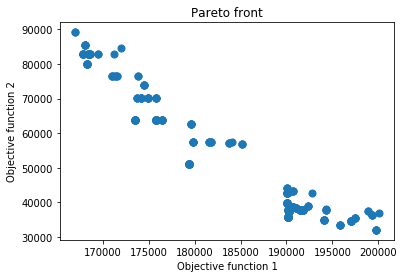

In [45]:
import numpy as np
import matplotlib.pyplot as plt


# Plot
plt.scatter(paretoo[:,0], paretoo[:,1], s = 50, marker='o')
plt.title('Pareto front')
plt.xlabel('Objective function 1')
plt.ylabel('Objective function 2')
plt.show()

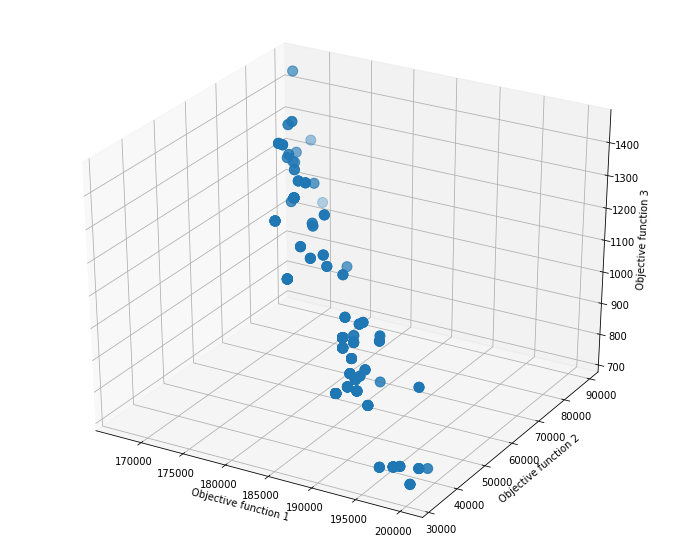

In [46]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(paretoo[:,0], paretoo[:,1], paretoo[:,2],s = 100, marker='o')
ax.set_xlabel('Objective function 1')
ax.set_ylabel('Objective function 2')
ax.set_zlabel('Objective function 3')

plt.show()

In [48]:
a = 0;
b =[]
import numpy as np
my = np.array([[1,5,4],[2,3,1],[3,6,7],[1,5,4]])

for i in range(len(my)):
    for j in range(len(my)):
        if not all(my[i] > my[j]):
            a += 1
            print(a)
    if a == len(my):
        a = 0
        b.append(my[j])
b

1
2
3
4
1
2
3
4
1
2
3
4
5


[array([1, 5, 4]), array([1, 5, 4])]

In [57]:
answer = ''
import numpy as np
my = np.array([[1,5,4],[2,3,1],[3,6,7],[1,5,4],[1,1,1]])

for i in range(len(my)):
    for j in range(len(my)):
        if all(my[i] > my[j]):
            print(my[i])

[3 6 7]
[3 6 7]
[3 6 7]
[3 6 7]


In [89]:
my = np.array([[1,5,4],[2,3,1],[3,6,7],[1,5,4],[1,1,1]])
a = 0
for i in range(len(my)):
    for j in range(len(my)):
        if all(my[i] >= my[j]) and (i!=j):
            a += 1
#    print(a)
    if a == 0:
        print(my[i])
    a = 0

[1 1 1]


In [83]:
my[0] >= my[4]

array([ True,  True,  True])

In [78]:
my = np.array([[1,5,4],[2,3,1],[3,6,7],[1,5,4],[0,0,0]])
a = 0
for i in range(len(my)):
    for j in range(len(my)):
        print(all(my[i] >= my[j]))

True
False
False
True
True
False
True
False
False
True
True
True
True
True
True
True
False
False
True
True
False
False
False
False
True


In [61]:
trying = np.array([[1,5,4],[2,3,1],[3,6,7],[1,5,4],[1,1,1]])

max(trying[0])

5

In [62]:
np.max(trying)

7

In [67]:
tr = np.array()

TypeError: array() missing required argument 'object' (pos 1)

In [66]:
tr = tr + np.array([1,3,4])

ValueError: operands could not be broadcast together with shapes (0,) (3,) 